# Loss landscape curve quality in relation to network depth (constant parameters)

Below are the results of tests measuring the quality of the mode-connecting curves found by the algorithm proposed by Garipov et al. (2018). The main purpose of these tests was to check how the quality of the curves change depending on the depth of the network (while maintaining a roughly constant parameters number).

The tests were conducted on the Pre-Activation version of the popular ResNet architecture with these numbers of layers:
- 56
- 110
- 164
- 218
- 272

Number of neurons per layer was decreased proportionally to the depth of the network (so as to maintaint ~570k paramters in each case).

All training has been done on the CIFAR10 dataset with 200 epochs and 0.0001 WD. LR was 0.1 for curve endpoints training and 0.03 for curve finding. The curve model was Bezier with 3 bends. The found curves were evaluated on 61 points. Batch normalization was used. Batch size was always 128.

Total time of training + evaluatiuon was about 60 hours using NVidia RTX 3070.

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
CURVE_STATS_DIR = "curve_eval"
CURVE_STATS_FILE = "curve.npz"

PRERESNET_DEPTHS = [
    56,
    110,
    164,
    218,
    272,
]

PRERESNET_CURVE_STATS_PATHS = [
    Path(f"./results_preresnet_CP_{depth}_cifar10") / CURVE_STATS_DIR / CURVE_STATS_FILE 
    for depth 
    in PRERESNET_DEPTHS
]

In [3]:
preresnet_curve_stats = {depth: np.load(path) for depth, path in zip(PRERESNET_DEPTHS, PRERESNET_CURVE_STATS_PATHS)}

Below are the actual diagrams with the results.

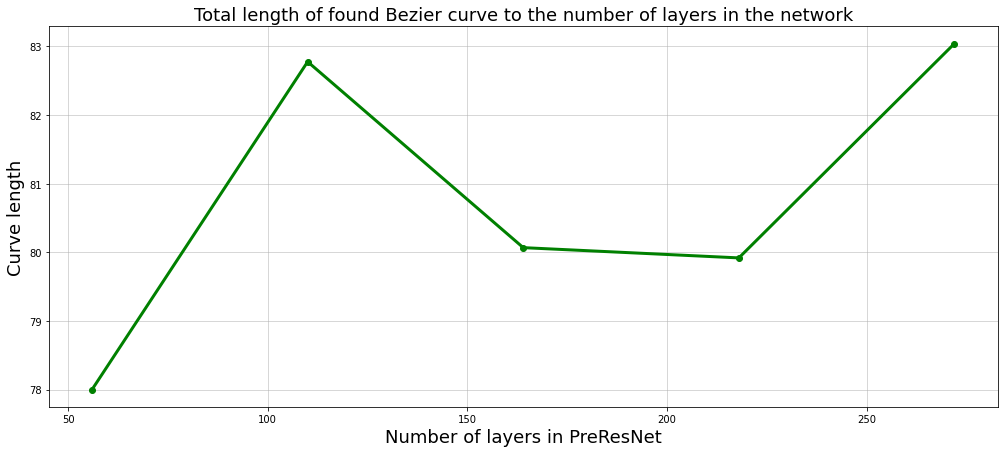

In [13]:
f = plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [np.sum(stats['dl']) for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.grid(True, linewidth=0.5, linestyle='-')
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Curve length', fontsize=18)  
plt.title("Total length of found Bezier curve to the number of layers in the network", fontsize=18)
plt.show()
f.savefig("total_length_cp.pdf", bbox_inches='tight')

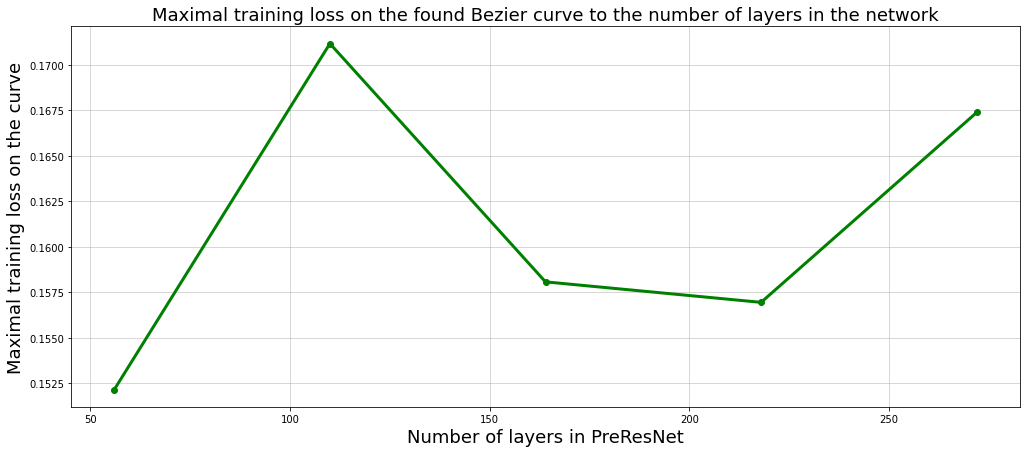

In [14]:
f = plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [stats['tr_loss_max'] for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.grid(True, linewidth=0.5, linestyle='-')
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Maximal training loss on the curve', fontsize=18)  
plt.title("Maximal training loss on the found Bezier curve to the number of layers in the network", fontsize=18)
plt.show()
f.savefig("max_train_loss_cp.pdf", bbox_inches='tight')

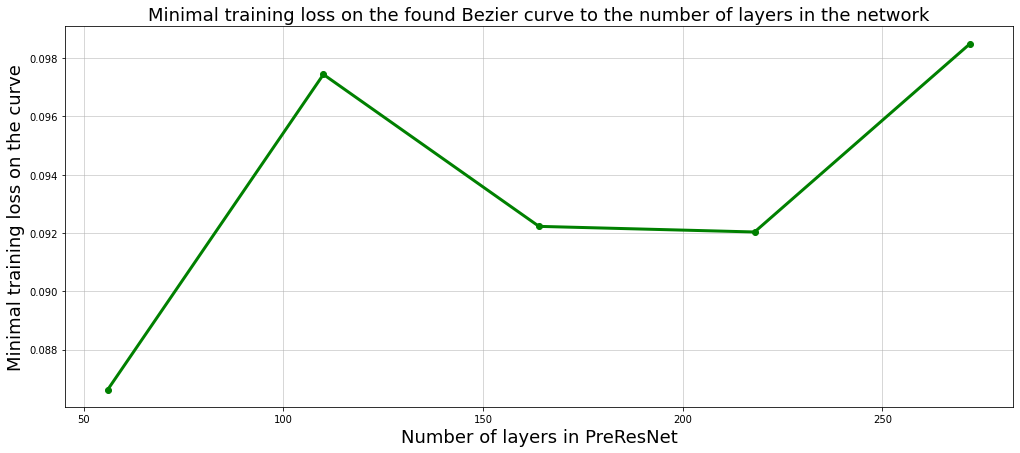

In [15]:
f = plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [stats['tr_loss_min'] for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.grid(True, linewidth=0.5, linestyle='-')
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Minimal training loss on the curve', fontsize=18)  
plt.title("Minimal training loss on the found Bezier curve to the number of layers in the network", fontsize=18)
plt.show()
f.savefig("min_train_loss_cp.pdf", bbox_inches='tight')

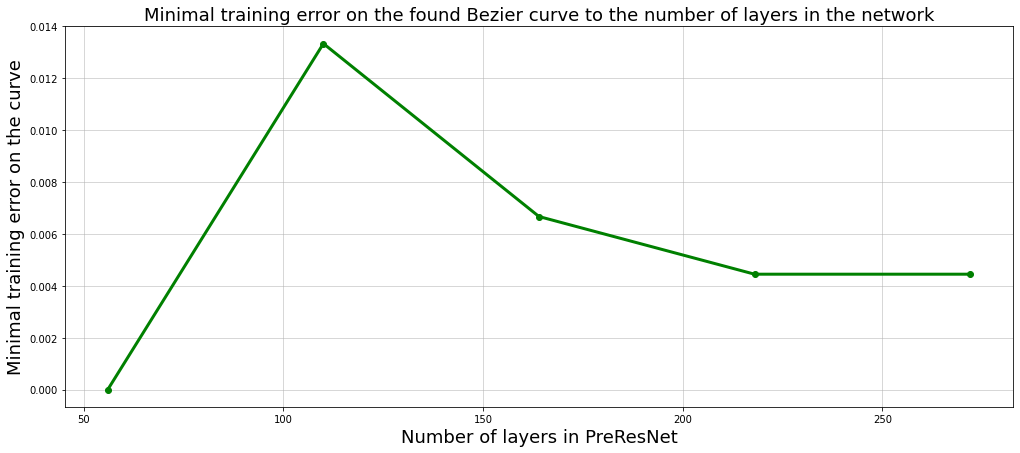

In [16]:
f = plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [stats['tr_err_min'] for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.grid(True, linewidth=0.5, linestyle='-')
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Minimal training error on the curve', fontsize=18)  
plt.title("Minimal training error on the found Bezier curve to the number of layers in the network", fontsize=18) 
plt.show()
f.savefig("min_train_err_cp.pdf", bbox_inches='tight')

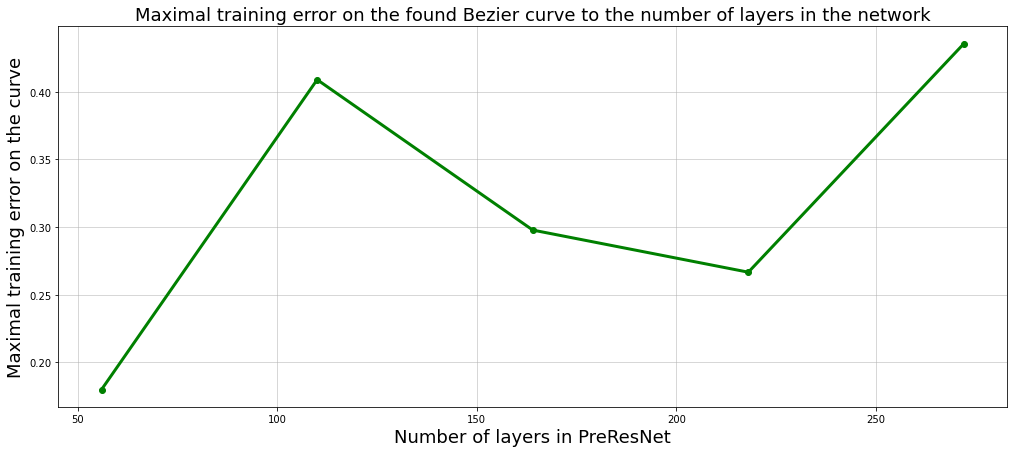

In [17]:
f = plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [stats['tr_err_max'] for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.grid(True, linewidth=0.5, linestyle='-')
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Maximal training error on the curve', fontsize=18)  
plt.title("Maximal training error on the found Bezier curve to the number of layers in the network", fontsize=18) 
plt.show()
f.savefig("max_train_err_cp.pdf", bbox_inches='tight')

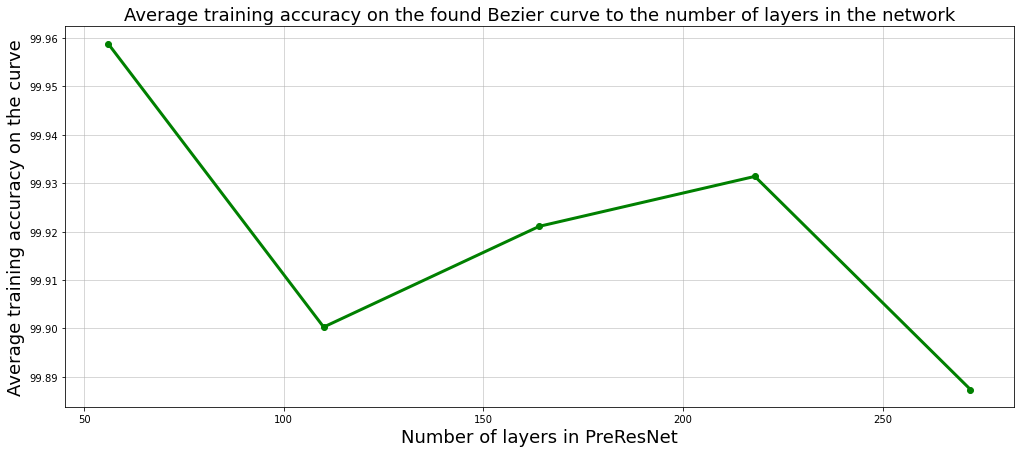

In [18]:
f = plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [np.mean(stats['tr_acc']) for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.grid(True, linewidth=0.5, linestyle='-')
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Average training accuracy on the curve', fontsize=18)  
plt.title("Average training accuracy on the found Bezier curve to the number of layers in the network", fontsize=18) 
plt.show()
f.savefig("avg_train_acc_cp.pdf", bbox_inches='tight')

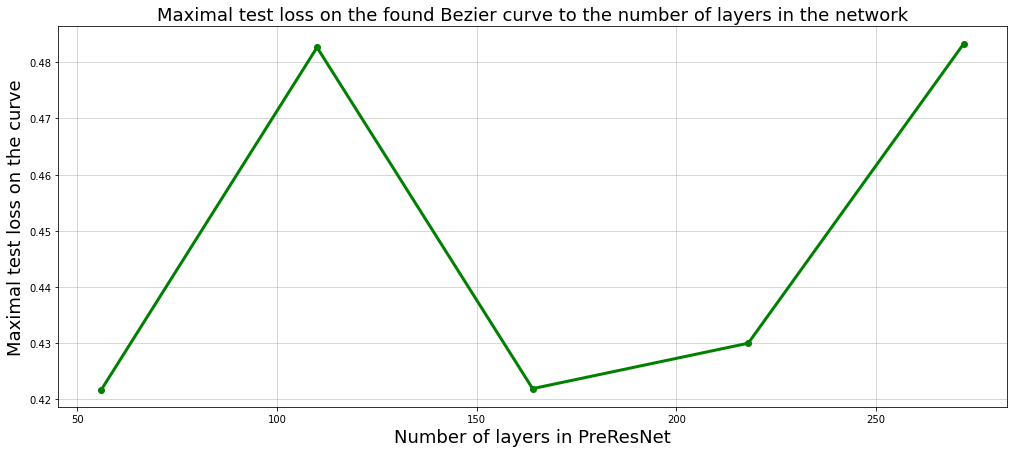

In [19]:
f = plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [stats['te_loss_max'] for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.grid(True, linewidth=0.5, linestyle='-')
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Maximal test loss on the curve', fontsize=18)  
plt.title("Maximal test loss on the found Bezier curve to the number of layers in the network", fontsize=18) 
plt.show()
f.savefig("max_test_loss_cp.pdf", bbox_inches='tight')

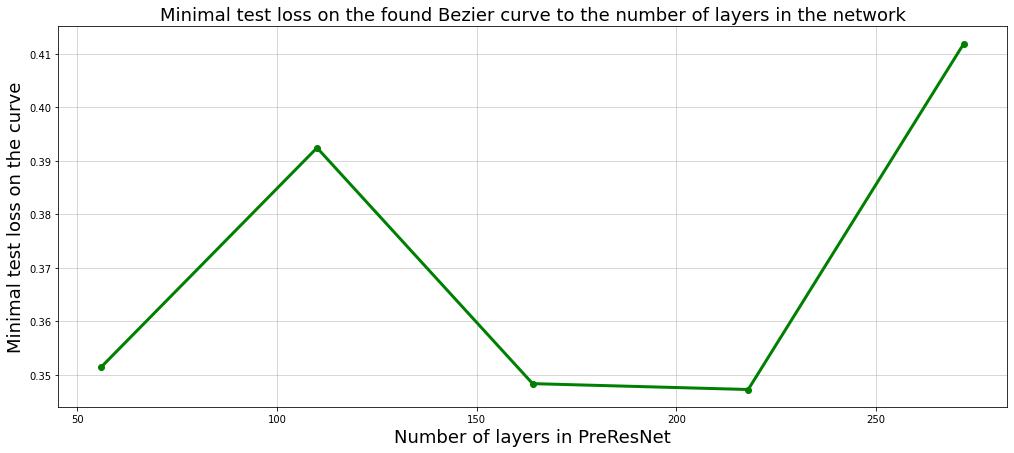

In [20]:
f = plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [stats['te_loss_min'] for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.grid(True, linewidth=0.5, linestyle='-')
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Minimal test loss on the curve', fontsize=18)  
plt.title("Minimal test loss on the found Bezier curve to the number of layers in the network", fontsize=18) 
plt.show()
f.savefig("min_test_loss_cp.pdf", bbox_inches='tight')

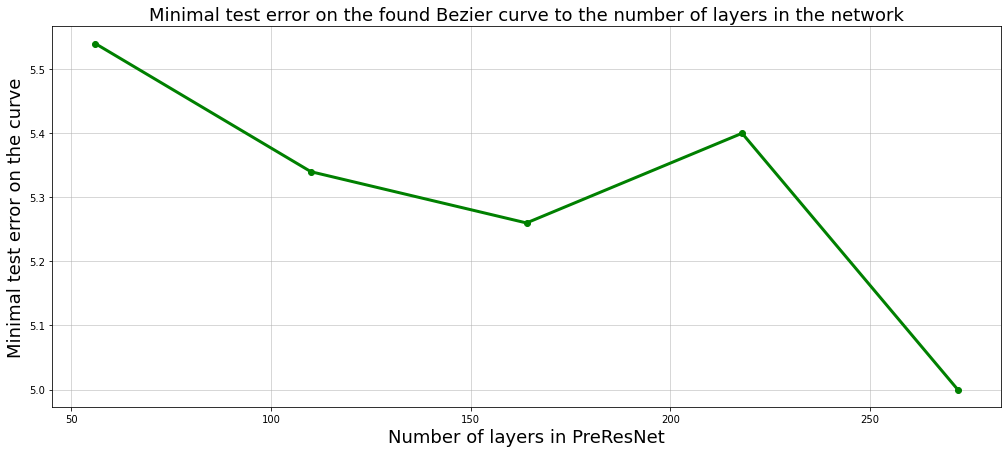

In [21]:
f = plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [stats['te_err_min'] for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.grid(True, linewidth=0.5, linestyle='-')
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Minimal test error on the curve', fontsize=18)  
plt.title("Minimal test error on the found Bezier curve to the number of layers in the network", fontsize=18) 
plt.show()
f.savefig("min_test_err_cp.pdf", bbox_inches='tight')

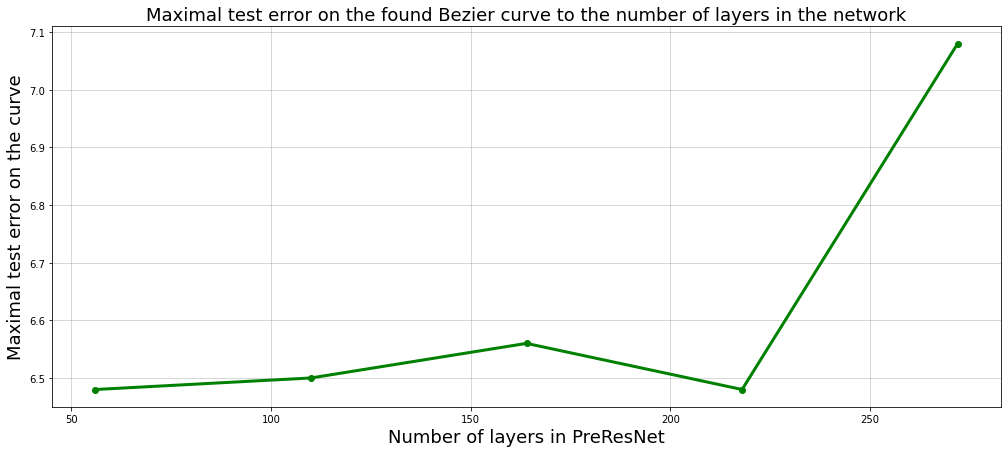

In [24]:
f = plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [stats['te_err_max'] for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.grid(True, linewidth=0.5, linestyle='-')
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Maximal test error on the curve', fontsize=18)  
plt.title("Maximal test error on the found Bezier curve to the number of layers in the network", fontsize=18) 
plt.show()
f.savefig("max_test_err_cp.pdf", bbox_inches='tight')

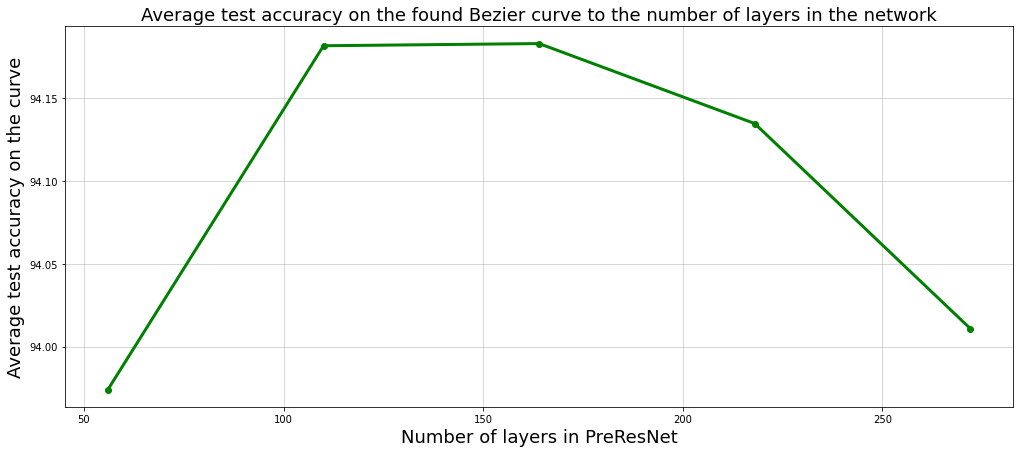

In [25]:
f = plt.figure(figsize=(17, 7))
plt.plot(
    PRERESNET_DEPTHS, [np.mean(stats['te_acc']) for stats in preresnet_curve_stats.values()],
    marker='o', color='green', linewidth=3,
)
plt.grid(True, linewidth=0.5, linestyle='-')
plt.xlabel('Number of layers in PreResNet', fontsize=18)  
plt.ylabel('Average test accuracy on the curve', fontsize=18)  
plt.title("Average test accuracy on the found Bezier curve to the number of layers in the network", fontsize=18) 
plt.show()
f.savefig("avg_test_acc_cp.pdf", bbox_inches='tight')

In [16]:
from IPython.display import IFrame
# to properly display IFrames with local PDFs I installed in Chrome the extension "PDF Viewer" and access the Jupyter
# notebook HTML client through URL with token

### Train loss Bezier curve visualization (PreResNet56/Cifar10)

In [17]:
IFrame("./results_preresnet_CP_56_cifar10/plane/train_loss_plane.pdf", width=1000, height=700)

### Test error Bezier curve visualization (PreResNet56/Cifar10)

In [18]:
IFrame("./results_preresnet_CP_56_cifar10/plane/test_error_plane.pdf", width=1000, height=700)

### Loss and accuracy on 1D plot (interpolated using second mode) (PreResNet56/Cifar10)

In [19]:
IFrame("./results_preresnet_CP_56_cifar10/checkpoints_checkpoint-200.pt_checkpoints2_checkpoint-200.pt_weights.h5_[-1.0,1.0,51].h5_1d_loss_acc.pdf", width=1000, height=700)

### Loss and accuracy on 1D (non-interpolated) (PreResNet56/Cifar10)

In [20]:
IFrame("./results_preresnet_CP_56_cifar10/checkpoints/1d_visualization/checkpoint-200.pt_weights_xignore=biasbn_xnorm=filter.h5_[-1.0,1.0,51].h5_1d_loss_acc.pdf", width=1000, height=700)

### Train loss surface 2D plot (PreResNet56/Cifar10)

In [21]:
IFrame("./results_preresnet_CP_56_cifar10/checkpoints/checkpoint-200.pt_weights_xignore=biasbn_xnorm=filter_yignore=biasbn_ynorm=filter.h5_[-1.0,1.0,15]x[-1.0,1.0,15].h5_train_loss_2dcontour.pdf", width=1000, height=700)

### Train loss 3D logarithmic plot (PreResNet56/Cifar10)

In [22]:
IFrame("./results_preresnet_CP_56_cifar10/checkpoints/preresnet56_CP_cifar10_paraview_landscape.png", width=1000, height=700)

## Conclusions


The results are less conclusive than the previous experiments in which the number of neurons per layers has been kept constant. However, one can observe that the performance of the obtained curve on unseen data is more variable - the minimal test error decreases as number of layers increases, but at the same time the maximal error increases. The net effect is that average test accuracy does not go down as the number of layers increases (it either goes up or stays roughly constant), although more tests may be needed.